# 8. Algoritmos de clasificación de ajuste fino

Este capítulo nos ayudará a optimizar el análisis predictivo mediante la clasificación algoritmos como **máquinas de vectores de soporte**, que es uno de los algoritmos de clasificación más comunes de la biblioteca de aprendizaje automático de scikit-learn. 


Consideremos un escenario somos analistas en una empresa de análisis de marketing. Su empresa se hizo cargo de un proyecto de Amazon para
 - predecir si un usuario comprará o no un producto durante las campañas de venta de temporada festiva. 

Se le han proporcionado datos anónimos sobre la actividad del cliente en el sitio web de Amazon: 

- la cantidad de productos comprados, 
- sus precios, 
- categorías de productos y otros. 

En tales escenarios, donde la variable objetivo es un valor discreto, por ejemplo, el cliente comprará el producto o no, este tipo se denominan problemas de **clasificación**. 


https://blog.bismart.com/la-clasificaci%C3%B3n-y-la-clusterizaci%C3%B3n-una-explicaci%C3%B3n-pr%C3%A1ctica


## Máquinas de Soporte Vectorial
Cuando se trata de datos que son **linealmente separables**, el objetivo del algoritmo de aprendizaje de Máquinas de Soporte Vectorial (SVM) es encontrar el límite entre las clases para que haya menos errores de clasificación. Sin embargo, el problema es que puede haber varios límites de decisión (B1, B2), que se pueden ver en la siguiente figura:


<figure>
<center><img src='https://drive.google.com/uc?export=view&id=18K3T0JH4UUWzev9QK6tuudPqrwqutwVg' width="300" />
<figcaption>

Figura 8.1: Límite de decisión múltiple</figcaption></center>
</figure>

Como resultado, surge la pregunta de cuál de los límites es mejor. 
- La solución es utilizar un margen como objetivo de optimización. 

Un margen se puede describir como la distancia entre el límite y dos puntos (de diferentes clases) que se encuentran más cerca del límite. La Figura 8.2 da una buena definición visual del margen.

El objetivo del algoritmo SVM es maximizar el margen, es aumentar el ancho del límite antes de llegar a un punto de datos. El algoritmo primero averigua el ancho del hiperplano y luego maximiza el margen. Elige el límite de decisión que tiene el margen máximo.


<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1hVGQlaWkek-DKg_kypCgJuZ_5BuR5dY3' width="300" />
<figcaption>

Figura 8.2: Límite de decisión con un ancho/margen diferente</figcaption></center>
</figure>




En la figura anterior, elige $B1$ porque tenía un margen mayor en comparación con $B2$. Puede consultar los márgenes de los límites de decisión de $B1$ y $B2$ en la Figura 8.2:

Ventajas
- Las SVM son efectivas en datos de alta dimensión, donde el número de dimensiones es mayor que el número de muestras de entrenamiento.
- Las SVM son conocidas por su uso de la función kernel, lo que la convierte en un algoritmo muy versátil.

Nota: Los métodos kernel son funciones matemáticas que se utilizan para convertir datos de un espacio de menor dimensión a un espacio de mayor dimensión, o viceversa.

Desventajas:
- Las SVM no calculan la probabilidad directamente y, en su lugar, utilizan una validación cruzada quíntuple para calcular la probabilidad, lo que puede hacer que el algoritmo sea considerablemente lento.
- Con datos de alta dimensión, es importante elegir la función kernel y el término de regularización, lo que puede hacer que el proceso sea muy lento.

## La intuición detrás del Máximo Margen

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1cPt_hg1uBUukelapwldLZyvRvEwP-yMT' width="300" />
<figcaption>

Figura 8.3: Interpretación geométrica del margen máximo</figcaption></center>
</figure>


La lógica detrás de tener márgenes grandes en el caso de una SVM es que tienen un 
- error de generalización más bajo 

en comparación con los márgenes pequeños, lo que puede resultar en datos sobreajustados.

Considere la Figura 8.3, donde tiene puntos de datos de dos clases: cuadrados y círculos. Los puntos de datos que están más cerca del límite se denominan 
- vectores de soporte, 

ya que se utilizan para calcular el margen. El margen del lado izquierdo del límite se 
- denomina hiperplano negativo 
- y el margen del lado derecho del límite se denomina hiperplano positivo.



Consideremos el hiperplano positivo y negativo de la siguiente manera:
<h1><center>

$w^{t}x_{pos} + b_0 = 1$ 

$w^{t}x_{neg} + b_1 = -1$

Ecuación de hiperplano positivo y negativo
</center></h1>

En las ecuaciones anteriores:
- $w$ se refiere a la pendiente del hiperplano.
- $b0$ y $b1$ se refieren a las intersecciones de los hiperplanos.
- $T$ se refiere a la transpuesta.
- $x_{pos}$ y $x_{neg}$ se refieren a los puntos por los que pasan los hiperplanos positivo y negativo, respectivamente.

Las ecuaciones anteriores también se pueden considerar como una ecuación de una línea:

$y = mx + c$, donde $m$ es la pendiente y $c$ es la intersección. Debido a esta similitud, SVM se denomina clasificador lineal SVM.

Restando las dos ecuaciones anteriores, se obtiene lo siguiente:

<h1><center>

$w^{t}(x_{pos}- x_{neg}) = 2$ 


Figura 8.5: Ecuación combinada de dos hiperplanos separados
</center></h1>

Normalizando la ecuación por el vector $w$, se obtiene lo siguiente, donde $m$ se refiere a los puntos de datos que tienes e $i$ se refiere al $i$-ésimo punto de datos:

<h1><center>

$ \big||w|\big| = 	\sqrt{ \sum_{i=1}^{m} w_{i^2}}$

Figura 8.6: Ecuación normalizada

</center></h1>

La ecuación anterior se reduce de la siguiente manera:

<center>
$ margin = \frac{ w^{t}(x_{pos}- x_{neg})}{\big||w|\big|}$ 
$  = \frac{2}{\big||w|\big|}$

Figura 8.7: Ecuación para margen $m$

</center>

Ahora, la función objetivo se obtiene maximizando el margen dentro de la restricción de que el límite de decisión debería clasificar todos los puntos correctamente.

una vez que tenga listo el límite de decisión, puede usar la siguiente ecuación para clasificar los puntos según el lado del límite de decisión en el que se encuentran:

<h1><center>

$w^{t}x_{i} + b_0 \geq 1 $   $ if y_i = 1$ 

$w^{t}x_{i} + b_0 \leq -1 $   $ if y_i = -1$ 

Figura 8.8: Ecuación para separar los puntos de datos en un hiperplano
</center></h1>

Para implementar un clasificador basado en SVM, puede usar el módulo scikit-learn de la siguiente manera:


1. Importar svm desde scikit-learn:

```
 from sklearn import svm
```

2. Cree una instancia del modelo SVM que luego se usará para entrenar en el conjunto de datos:

```
   model = svm.SVC()
```

  En la función anterior, también puede especificar el tipo de núcleo/kernel (lineal, sigmoide, rbf, etc.), el parámetro de regularización C, el valor gamma del núcleo, etc. Puede leer la lista completa de parámetros disponibles junto con sus valores predeterminados: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.

3. Una vez que tenga la instancia del modelo, puede usar `model.fit(X_train, y_train)` para entrenar el modelo y `model.predict(X)` y obtener la predicción.

Hasta ahora hemos usado un el margen duro, que no deja espacio para errores. En otras palabras,
- todas las instancias de una clase deben estar en un lado del margen. 
 
Sin embargo, este comportamiento rígido puede afectar la generalización del modelo. Para resolver esto, puede usar un clasificador de 
- margen suave.

## Casos linealmente inseparables

Los casos linealmente inseparables, como el que se ilustra en la siguiente figura, no puede usar un clasificador de **margen rígido**. 

La solución es introducir un nuevo tipo de clasificador, conocido como clasificador de **margen suave,** utilizando la variable de holgura ξ. Esta variable convierte las ecuaciones discutidas anteriormente en desigualdades al permitir algunos errores, como se muestra en la Figura 8.9:

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1tacYCJHi8q-avC6oYJNygpfGuF-7MsgJ' width="300" />
<figcaption>

Figura 8.9: Puntos de datos linealmente inseparables</figcaption></center>
</figure>




Una SVM de margen suave funciona haciendo lo siguiente:
1. Introducimos una variable de holgura $\xi$
2. Relajamos las restricciones
3. Penalizamos la relajación $C$

<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1mXt5qPxnxNihjAyo_7MSO7umYAvK3Di0' width="300" />
<figcaption>

Figura 8.10: Uso de la variable de holgura ξ para datos linealmente inseparables</figcaption></center>
</figure>


Las restricciones lineales se pueden cambiar agregando la variable de holgura a la ecuación en la Figura 8.5 de la siguiente manera:

<h1><center>

$w^{t}x_{i} + b_0 \geq 1 -\xi_i$   $ if y_i = 1$ 

$w^{t}x_{i} + b_0 \leq -1 + \xi_i $   $ if y_i = -1$ 

Figura 8.11: Restricciones lineales para maximizar el margen con la variable de holgura $\xi$
</center></h1>



La **función objetivo** para puntos de datos linealmente inseparables se obtiene minimizando lo siguiente:

<center>
$ \frac{1}{2}\big||w|\big|^2 +c \big(\sum_{i} \xi_i\big)$

Figura 8.12: Función objetivo a minimizar

</center>


Aquí, **$C$ es el parámetro del costo** de la penalización (regularización). Este parámetro $C$ se puede especificar como un parámetro al llamar a la función `svm.SVC()`, como se explicó en la sección anterior.



## Casos linealmente inseparables usando el kernel
En el ejemplo anterior, se observó cómo usar un SVM de margen suave para clasificar conjuntos de datos usando la variable de holgura. Sin embargo, puede haber escenarios en los que sea bastante difícil separar los datos. 

Por ejemplo, en la siguiente figura, sería imposible tener un límite de decisión utilizando la variable de holgura y un hiperplano lineal:



<figure>
<center><img src='https://drive.google.com/uc?export=view&id=17q78lYjS99MWSpqkFq5lKWc8JuPHeS--' width="300" />
<figcaption>


Figura 8.13: Puntos de datos linealmente inseparables</figcaption></center>
</figure>

En este escenario, puede utilizar el concepto de kernel/núcleo, que crea una combinación no lineal de características originales (X1, X2) para proyectar a un espacio de mayor dimensión a través de una función de mapeo, $\varphi$, para hacerlo linealmente separable:


<figure>
<center><img src='https://drive.google.com/uc?export=view&id=1DxNzquMAQ9k5xHynhLqDsYJ5TEg6Etde' width="500" />
<figcaption>


Figura 8.14: Interpretación geométrica y ecuación para proyección de una dimensión baja a una alta</figcaption></center>
</figure>

El problema con este mapeo explícito de funciones es que la dimensionalidad de la función puede ser muy alta, lo que dificulta su representación explícita en la memoria. Esto se mitiga usando el truco del núcleo. El truco del kernel básicamente reemplaza el producto escalar $x_i^T$ $x_j$ con un kernel φ $x_i^T$φ($x_j$), que se puede definir de la siguiente manera:

<center>
$ \frac{1}{2}\big||w|\big|^2 +c \big(\sum_{i} \xi_i\big)$

Figura 8.15: Función del núcleo

</center>

Hay diferentes tipos de funciones del núcleo:

Un núcleo también se puede interpretar como una función de similitud y se encuentra entre
- 0 (una muestra exactamente diferente) y
-  1 (una muestra que es exactamente igual).

En scikit-learn, las siguientes funciones del kernel están disponibles:

- linear: $(x, x')$

- polynomial: $(\gamma(x, x') + r)^d $. $d$ se especifica por palabra clave grado, $r$ por coef0.

- rbf: $exp(-\gamma||x-x'||2)$. gamma se especifica mediante la palabra clave gamma, debe ser mayor que 0.
- sigmoid  $(tanh(\gamma (x, x') + r))$, donde r está especificado por coef0.



Entonces, puedes usarlas de la siguiente manera:
```
svm.SVC(kernel='poly', C=1)
```
Aquí, puede cambiar el kernel usando diferentes funciones del kernel como 'linear', 'poly', etc., que es similar a lo que hemos descrito en la Figura 8.17.

## Ejercicio 8.01: Entrenamiento de un algoritmo SVM sobre un conjunto de datos

En este ejercicio, usaremos el conjunto de datos Shill Bidding, cuyo archivo se llama `Shill_Bidding_Dataset.csv`. EL objetivo es utilizar esta información para predecir si una subasta representa un comportamiento normal o no (0 significa comportamiento normal y 1 significa comportamiento anormal). 

In [1]:
!curl https://raw.githubusercontent.com/limspiga/customer-analytics/main/week-6a/Shill_Bidding_Dataset.csv -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  537k  100  537k    0     0  1663k      0 --:--:-- --:--:-- --:--:-- 1663k


1. Importe pandas, numpy, train_test_split, cross_val_score y svm de la biblioteca sklearn:

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np

2. Lea el conjunto de datos en un DataFrame denominado data usando pandas, como se muestra en el siguiente fragmento, y observe las primeras filas de los datos:

In [53]:
data=pd.read_csv("Shill_Bidding_Dataset.csv")

3. Primero, elimine las columnas que son irrelevantes para el estudio de caso. Estas son columnas de ID y, por lo tanto, serán únicas para cada entrada. Debido a su singularidad, no agregarán ningún valor al modelo y, por lo tanto, se pueden descartar:

In [54]:
# Drop irrelevant columns
data.drop(["Record_ID","Auction_ID","Bidder_ID"],axis=1,\
          inplace=True)
data.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


Verifique los tipos de datos, de la siguiente manera:

In [55]:
data.dtypes

Bidder_Tendency           float64
Bidding_Ratio             float64
Successive_Outbidding     float64
Last_Bidding              float64
Auction_Bids              float64
Starting_Price_Average    float64
Early_Bidding             float64
Winning_Ratio             float64
Auction_Duration            int64
Class                       int64
dtype: object

5. Busque cualquier valor faltante usando el siguiente código:

In [56]:
 data.isnull().sum()   ### Check for missing values

Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

In [57]:
# Ahora que no faltan valores, entrene el algoritmo SVM sobre el conjunto de datos.

6. Divida los datos en conjuntos de entrenamiento y prueba y guárdelos como X_train, X_test, y_train y y_test como se muestra:

In [58]:
target = 'Class'
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split\
                                   (X.values,y,test_size=0.50,\
                                    random_state=123, \
                                    stratify=y)


7. Ajuste un modelo SVM lineal con C=1:

In [59]:
clf_svm = svm.SVC(kernel='linear', C=1)
clf_svm.fit( X_train, y_train)

SVC(C=1, kernel='linear')

8. Calcule la puntuación de precisión utilizando el siguiente código:

In [60]:
 clf_svm.score(X_test, y_test)

 # Para el conjunto de datos de la subasta, 
 # el clasificador SVM obtendrá una precisión de alrededor del 97,75%. 
 # Esto implica que puede predecir con precisión el 97,75 % de los datos de prueba.

0.9775387535590003

In [61]:
# clf_svm.predict(X_test)[:10]
X_test[0]


array([0.08571429, 0.13043478, 0.        , 0.94807407, 0.2173913 ,
       0.        , 0.94801389, 0.94736842, 5.        ])

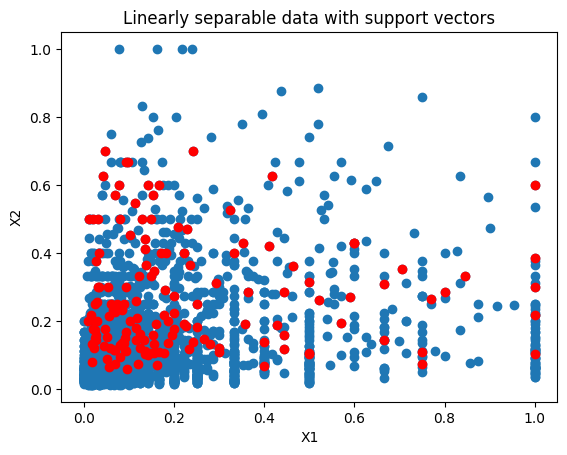

In [94]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from mlxtend.plotting import plot_decision_regions
# Plot decision function on training and test data
# Split data to train and test on 80-20 ratio

# Get support vectors themselves
support_vectors = clf_svm.support_vectors_

# # Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
